<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercício-1---Classification" data-toc-modified-id="Exercício-1---Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercício 1 - Classification</a></span><ul class="toc-item"><li><span><a href="#plotData---Testes" data-toc-modified-id="plotData---Testes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>plotData - Testes</a></span></li><li><span><a href="#plotData---Oficial" data-toc-modified-id="plotData---Oficial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plotData - Oficial</a></span></li><li><span><a href="#Funçao-g(z)---Sigmoid" data-toc-modified-id="Funçao-g(z)---Sigmoid-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Funçao g(z) - Sigmoid</a></span></li><li><span><a href="#Cost-Function-e-Gradient" data-toc-modified-id="Cost-Function-e-Gradient-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cost Function e Gradient</a></span></li><li><span><a href="#Otimizando-via-fminuc" data-toc-modified-id="Otimizando-via-fminuc-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Otimizando via fminuc</a></span></li><li><span><a href="#plotDecisionBoundary" data-toc-modified-id="plotDecisionBoundary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>plotDecisionBoundary</a></span></li><li><span><a href="#Prevendo-Valores" data-toc-modified-id="Prevendo-Valores-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Prevendo Valores</a></span></li></ul></li><li><span><a href="#Exercício-2---Regularized-Class" data-toc-modified-id="Exercício-2---Regularized-Class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercício 2 - Regularized Class</a></span><ul class="toc-item"><li><span><a href="#Feature-Mapping" data-toc-modified-id="Feature-Mapping-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Mapping</a></span></li><li><span><a href="#Cost-Function-e-Gradient" data-toc-modified-id="Cost-Function-e-Gradient-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cost Function e Gradient</a></span></li><li><span><a href="#Otimizando-via-fminunc" data-toc-modified-id="Otimizando-via-fminunc-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Otimizando via fminunc</a></span></li><li><span><a href="#Decision-Boundary" data-toc-modified-id="Decision-Boundary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Decision Boundary</a></span></li><li><span><a href="#Prevendo-Valores" data-toc-modified-id="Prevendo-Valores-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Prevendo Valores</a></span></li></ul></li></ul></div>

Notebook criado para facilitar a execução do exercício 2 do curso de Introdução à Machine Learning. A execução em tempo real e a visualização do estado de algumas variáveis são alguns dos fatores que fazem com que o Jupyter Notebook seja extremamente útil na realização das tarefas.

# Exercício 1 - Classification

In [67]:
# Lendo arquivo
data = load('ex2data1.txt');

head = data(1:10,:)

head =

   34.62366   78.02469    0.00000
   30.28671   43.89500    0.00000
   35.84741   72.90220    0.00000
   60.18260   86.30855    1.00000
   79.03274   75.34438    1.00000
   45.08328   56.31637    0.00000
   61.10666   96.51143    1.00000
   75.02475   46.55401    1.00000
   76.09879   87.42057    1.00000
   84.43282   43.53339    1.00000



Os dados acima ilustram um problema de classificação e representam, respectivamente, a nota nos dois primeiros exames de alunos e, como target, o resultado se o mesmo foi aprovado ou não na disciplina.

    - Coluna 1: Exame 1
    - Coluna 2: Exame 2
    - Coluna 3: Aprovado (1) e Reprovado (0)

In [68]:
# Organizando dataset em features e target
X = data(:, 1:2);
y = data(:, 3);

# Testando
X(1:5, :)
y(1:5, :)

ans =

   34.624   78.025
   30.287   43.895
   35.847   72.902
   60.183   86.309
   79.033   75.344

ans =

   0
   0
   0
   1
   1



## plotData - Testes

O próximo desafio é implementar uma função chamada ```plotData()``` responsável por imprimir os dados coletados em forma de gráfico.

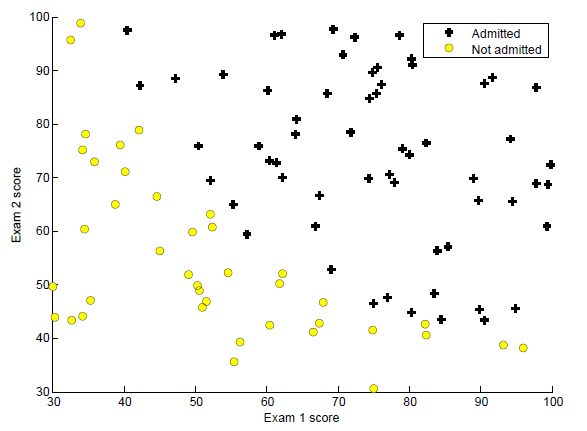

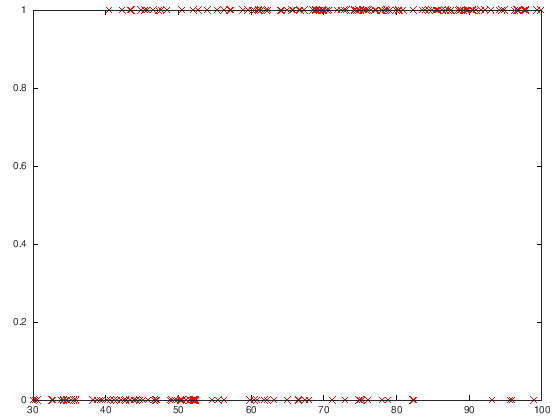

In [3]:
# Tentativas de plotagem para implementação da função plotData(X, y)
figure()
plot(X, y, 'rx')

Parece que o ideal é eximir o ```y``` da plotagem, mantendo apenas os valores em ```X```

In [4]:
help figure

'figure' is a function from the file C:\Octave\Octave-4.4.1\share\octave\4.4.1\m\plot\util\figure.m

 -- figure
 -- figure N
 -- figure (N)
 -- figure (..., "PROPERTY", VALUE, ...)
 -- H = figure (...)
     Create a new figure window for plotting.

     If no arguments are specified, a new figure with the next available
     number is created.

     If called with an integer N, and no such numbered figure exists,
     then a new figure with the specified number is created.  If the
     figure already exists then it is made visible and becomes the
     current figure for plotting.

     Multiple property-value pairs may be specified for the figure
     object, but they must appear in pairs.

     The optional return value H is a graphics handle to the created
     figure object.

     Programming Note: The full list of properties is documented at
     *note Figure Properties: Figure Properties.

     See also: axes, gcf, clf, close.

Additional help for built-in functions and operators 

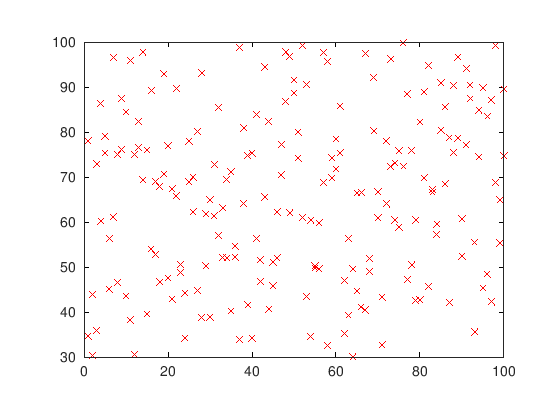

In [5]:
# Nova tentativa -> apenas dados em X e com novas configurações de plotagem
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)
plot(X, 'rx')

Está tudo junto e misturado. O ideal é separar os valores de X que são classificados como 1 dos valores que são classificados como 0.

Fonte para configuração da plotagem: https://dawes.wordpress.com/2009/12/19/nice-octave-plots/

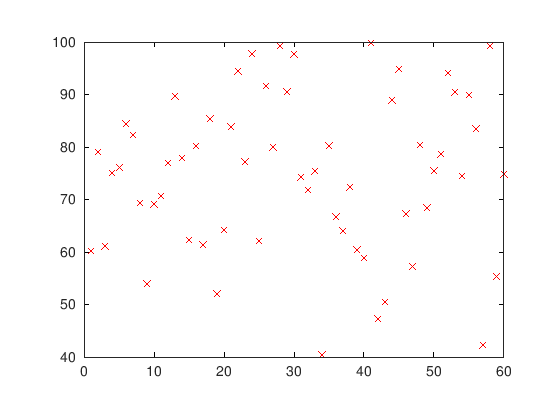

In [6]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = X(y==1);
plot(X_pass, 'rx')

Parece que está ficando OK. Tentando algumas implementações adicionais.

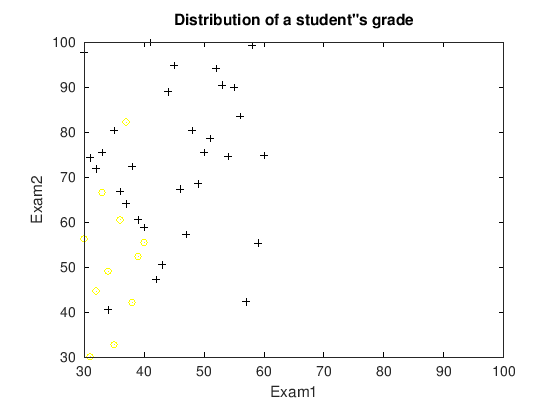

In [7]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = X(y==1);
X_rec = X(y==0);

# Plotando
plot(X_pass, 'k+')
hold on;
plot(X_rec, 'yo')
ylabel('Exam2')
xlabel('Exam1')
title('Distribution of a student"s grade')
axis([30, 100, 30, 100])

Algo de errado não está certo...

In [8]:
# Será necessário utilizad a função find
help find

'find' is a built-in function from the file libinterp/corefcn/find.cc

 -- IDX = find (X)
 -- IDX = find (X, N)
 -- IDX = find (X, N, DIRECTION)
 -- [i, j] = find (...)
 -- [i, j, v] = find (...)
     Return a vector of indices of nonzero elements of a matrix, as a
     row if X is a row vector or as a column otherwise.

     To obtain a single index for each matrix element, Octave pretends
     that the columns of a matrix form one long vector (like Fortran
     arrays are stored).  For example:

          find (eye (2))
            => [ 1; 4 ]

     If two inputs are given, N indicates the maximum number of elements
     to find from the beginning of the matrix or vector.

     If three inputs are given, DIRECTION should be one of "first" or
     "last", requesting only the first or last N indices, respectively.
     However, the indices are always returned in ascending order.

     If two outputs are requested, 'find' returns the row and column
     indices of nonzero elements of a 

A função ```find(condition)``` irá retornar os índices de determinada matriz que satisfazem a condição especificada. Assim, os índices serão mantidos e não iremos correr riscos do plot ficar segregado.

In [9]:
# Aplicando find
X_pass = find(y == 1);
X_pass(1:7, :)

# Verificando diretamente no y se os índices retornados realmente são valores y=1
y(1:10)

ans =

    4
    5
    7
    8
    9
   10
   13

ans =

   0
   0
   0
   1
   1
   0
   1
   1
   1
   1



Realmente...

In [10]:
# Aplicando valores também em alunos reprovados
X_rec = find(y == 0);
X_rec(1:7)

# Verificando y (pelo exemplo acima, o retorno de X_rec deve conter 1, 2, 3, 6...)
y(1:10)

ans =

    1
    2
    3
    6
   11
   12
   15

ans =

   0
   0
   0
   1
   1
   0
   1
   1
   1
   1



Agora só nos resta implementar a plotagem.

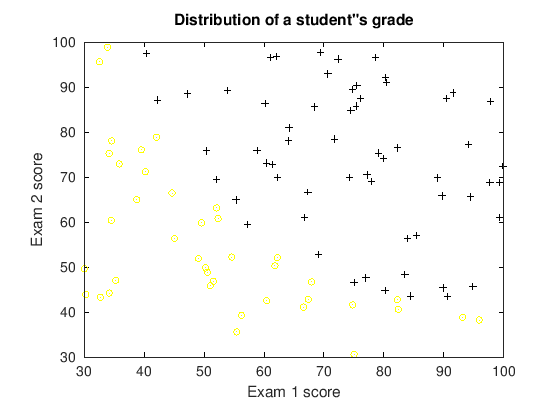

In [11]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = find(y==1);
X_rec = find(y==0);

# Plotando
plot(X(X_pass, 1), X(X_pass, 2), 'k+')
hold on;
plot(X(X_rec, 1), X(X_rec, 2), 'yo')
ylabel('Exam 2 score')
xlabel('Exam 1 score')
title('Distribution of a student"s grade')

Para um melhor entendimento (houve dificuldade em entender a linha ```X(X_pass, 1)``` ), vou refazer a plotagem indexando as variáveis com um nome sugestivo.

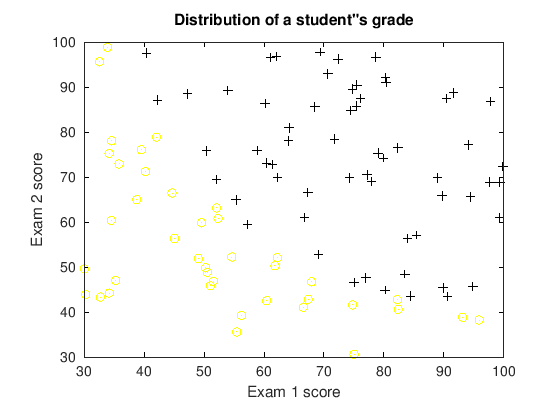

In [12]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = find(y==1);
X_rec = find(y==0);

X_exam1_pass = X(X_pass, 1);
X_exam2_pass = X(X_pass, 2);

X_exam1_rec = X(X_rec, 1);
X_exam2_rec = X(X_rec, 2);

# Plotando
plot(X_exam1_pass, X_exam2_pass, 'k+', 'LineWidth', 2, ...
'MarkerSize', 8)
hold on;
plot(X_exam1_rec, X_exam2_rec, 'yo', 'LineWidth', 2, ...
'MarkerSize', 8)
ylabel('Exam 2 score')
xlabel('Exam 1 score')
title('Distribution of a student"s grade')

## plotData - Oficial

In [13]:
function plotData(X, y)
    % ---------------------
    %     Description
    % ---------------------
    % Função responsável pela plotagem gráfica da distribuição das notas dos alunos (Exames 1 e 2).
    % Os valores serão distribuídos e separados de acordo com a classificação proposta em y (aprovado/reprovado)
    
    % Encontra os índices dos aprovados e dos reprovados
    X_pass = find(y==1);
    X_rec = find(y==0);
    
    % Separa os dados de aprovados e reprovados por exame
    X_pass_e1 = X(X_pass, 1);
    X_pass_e2 = X(X_pass, 2);
    X_rec_e1 = X(X_rec, 1);
    X_rec_e2 = X(X_rec, 2);
    
    % Configura plotagem
    h = figure;
    set (h,'papertype', '<custom>');
    set (h,'paperunits','inches');
    set (h,'papersize',[3 2.5]);
    set (h,'paperposition', [0,0,[3 2.5]]);
    set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75]);
    set (0,'defaultaxesfontsize', 14);
    
    % Plota os dados
    plot(X_pass_e1, X_pass_e2, 'k+', ...
        'MarkerSize', 7, 'LineWidth', 8)
    hold on;
    plot(X_rec_e1, X_rec_e2, 'yo', ...
        'MarkerSize', 7, 'LineWidth', 3)
    
    # Legendas e labels
    xlabel('Nota no Exame 1')
    ylabel('Nota no Exame 2')
    title('Distribuicao de Notas e Classificacao dos Estudantes')

endfunction

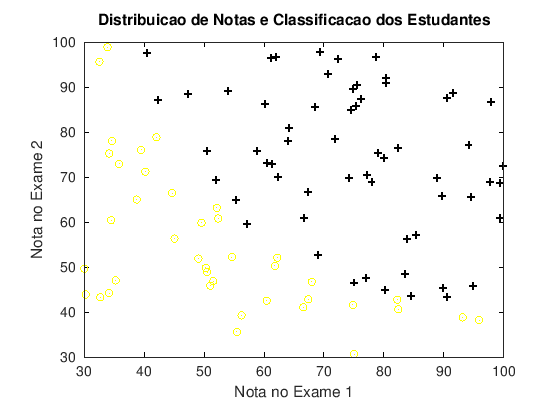

In [69]:
# Chamando a função
plotData(X, y)

## Funçao g(z) - Sigmoid

Nesta etapa da atividade, é preciso realizar o warmUpExercise que, por sua vez, contempla a criação de uma função que calcula a função ```g(z)``` sigmoidal.

In [15]:
# Realizando alguns testes
z = [1 2 3; 4 5 6];
g = zeros(size(2))

g = 0


In [16]:
# Tentando aplicar resultado à função g
g = 1 / (1 + exp(z))

error: operator /: nonconformant arguments (op1 is 1x1, op2 is 2x3)


In [17]:
# Testando com vetores
v = [1 2 3]
exp(v)

v =

   1   2   3

ans =

    2.7183    7.3891   20.0855



In [18]:
# Encontrando o jeito certo = element-wise divison
m = [1 2; 3 4]
1 ./ exp(m)

m =

   1   2
   3   4

ans =

   0.367879   0.135335
   0.049787   0.018316



In [19]:
# Aplicando à função g
z = [3; 14; 20; 2];
g = 1 ./ (1 + exp(z))

g =

   0.0474258731776
   0.0000008315280
   0.0000000020612
   0.1192029220221



Aplicando função g sigmoidal

In [20]:
function g = sigmoid(z)
    % ----------------
    %    DESCRIÇÃO
    % ----------------
    % Função responsável por calcular função g(z)
    %
    % INPUT:
    % z -> parâmetros para o cálculo de g(z), lembrando que z define theta^T * X e também pode ser um vetor ou matriz.
    %
    % OUTPUT:
    % g -> resultado a função para os parâmetros z passados.
    
    g = 1 ./ (1 + exp(-z));

endfunction

In [21]:
# Chamando a função g
z = [0, 1000000, .5, 1];
g = sigmoid(z)

g =

   0.50000   1.00000   0.62246   0.73106



## Cost Function e Gradient

Bloco de instruções responsável por definir a ```Função Custo``` para regressão logística, bem como as derivadas parciais do gradiente.

In [22]:
# De maneira vetorizada
m = length(y)

m =  100


In [23]:
# Configurando termos
[m, n] = size(X)

X_train = [ones(m, 1) X];
X_train(1:5, :)

initial_theta = zeros(n + 1, 1) # theta = n+1 dimensional

m =  100
n =  2
ans =

    1.0000   34.6237   78.0247
    1.0000   30.2867   43.8950
    1.0000   35.8474   72.9022
    1.0000   60.1826   86.3086
    1.0000   79.0327   75.3444

initial_theta =

   0
   0
   0



In [24]:
# Definindo z e função g (h(x))
z = X_train * initial_theta;
z(1:5)

h = sigmoid(z);
h(1:5)

ans =

   0
   0
   0
   0
   0

ans =

   0.50000
   0.50000
   0.50000
   0.50000
   0.50000



In [25]:
# Definindo a função custo
J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h))

J =  0.69315


O resultado bateu com o do exercício. Calculando agora o gradiente (derivadas parciais);

In [26]:
# Definindo o gradiente
gradient = zeros(size(initial_theta))

gradient =

   0
   0
   0



In [27]:
gradient = X_train' * (h - y) 

gradient =

    -10.000
  -1200.922
  -1126.284



In [217]:
# Colocando tudo em função
function [J, grad] = costFunction(theta, X, y)
    % ------------------
    %    DESCRIPTION
    % ------------------
    % Função responsável por calcular a função de custo J e o gradiente (Derivadas parciais)
    %
    % INPUT:
    % theta -> parâmetros theta que definem o comportamento do moelo;
    % X     -> dados de treinamento para cálculo de previsões;
    % y     -> dados target.
    %
    % OUTPUT:
    % J     -> função de custo para a hypothesis definida;
    % grad  -> gradiente da função para cada parâmetro theta (derivadas parciais).
    
    # Define o parâmetro m
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    # Adiciona coluna para x_0 nos dados de treinamento
    X_train = [ones(m, 1), X];
    
    # Calcula hypothesis
    z = X_train * theta;
    h = sigmoid(z);
    
    # Calcula função de custo J
    J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h));
    
    # Calcula gradiente para cada entrada
    grad = (X_train' * (h - y)) / m;

endfunction

In [29]:
# Inicializando parâmetros e chamando função
[m, n] = size(X);
initial_theta = zeros(n + 1, 1);

[J, grad] = costFunction(initial_theta, X, y)

J =  0.69315
grad =

   -0.10000
  -12.00922
  -11.26284



Os resultados surtiram o efeito esperado através da inicialização dos parâmetros theta como [0; 0; 0]

## Otimizando via fminuc

In [30]:
# Inicializando os parâmetros theta de modo diferente
test_theta = [-24; .2; .2]

test_theta =

  -24.00000
    0.20000
    0.20000



In [31]:
# Chamando função que calcula J e grad
[cost, gradient] = costFunction(test_theta, X, y)

cost =  0.21833
gradient =

   0.042903
   2.566234
   2.646797



In [32]:
# Verificando novamente os resultados para theta inicial
inicial_theta = zeros(size(X_train, 2), 1)
[cost, gradient] = costFunction(initial_theta, X, y)

inicial_theta =

   0
   0
   0

cost =  0.69315
gradient =

   -0.10000
  -12.00922
  -11.26284



In [33]:
# Verificando com fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options)

theta =

  -25.16127
    0.20623
    0.20147

cost =  0.20350


Absurdamente melhor.

## plotDecisionBoundary

In [34]:
help contour

'contour' is a function from the file C:\Octave\Octave-4.4.1\share\octave\4.4.1\m\plot\draw\contour.m

 -- contour (Z)
 -- contour (Z, VN)
 -- contour (X, Y, Z)
 -- contour (X, Y, Z, VN)
 -- contour (..., STYLE)
 -- contour (HAX, ...)
 -- [C, H] = contour (...)
     Create a 2-D contour plot.

     Plot level curves (contour lines) of the matrix Z, using the
     contour matrix C computed by 'contourc' from the same arguments;
     see the latter for their interpretation.

     The appearance of contour lines can be defined with a line style
     STYLE in the same manner as 'plot'.  Only line style and color are
     used; Any markers defined by STYLE are ignored.

     If the first argument HAX is an axes handle, then plot into this
     axes, rather than the current axes returned by 'gca'.

     The optional output C contains the contour levels in 'contourc'
     format.

     The optional return value H is a graphics handle to the hggroup
     comprising the contour lines.

     Exa

In [35]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];
         
    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    %legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end

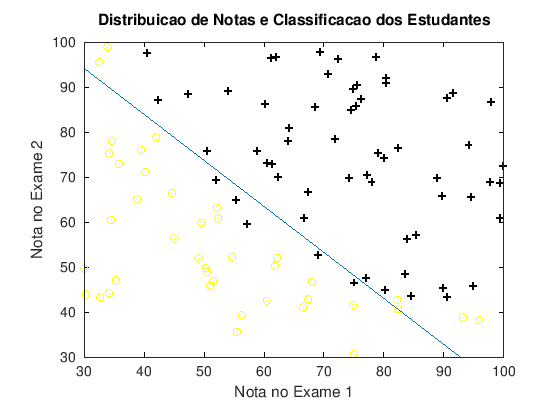

In [36]:
% Plotando resultados para otimizando por fminunc
plotDecisionBoundary(theta, X_train, y)

## Prevendo Valores

Neste momento, será necessário criar uma função ```predict(theta, X)``` para previsão de valores e classificação.

In [37]:
# Confirmando os valores ótimos para theta
theta

theta =

  -25.16127
    0.20623
    0.20147



In [38]:
# Confirmando os valores de X
X_train(1:5, :)

ans =

    1.0000   34.6237   78.0247
    1.0000   30.2867   43.8950
    1.0000   35.8474   72.9022
    1.0000   60.1826   86.3086
    1.0000   79.0327   75.3444



In [39]:
# Realizando um teste de predição
p = X_train * theta;
p(1:5, :)

ans =

   -2.3011
  -10.0716
   -3.0807
    4.6390
    6.3175



In [40]:
# Seria possível comparar com nosso target y?
y(1:5, :)

ans =

   0
   0
   0
   1
   1



Me parece que os valores que se encontram abaixo de um treshold são classificados como 0, enquanto valores localizados acima deste treshold são classificados como 1. A intenção é descobrir esse threshold, ou então determinar uma outra função para predição dos valores, o que pode ser bem mais provável.

In [41]:
# Testando função sigmoid
z = X_train * theta;
h = sigmoid(z);
h(1:10, :)

ans =

   0.091033009
   0.000042260
   0.043908734
   0.990424746
   0.998198818
   0.010797825
   0.998978132
   0.423243648
   0.999710025
   0.735403760



Acredito que o threshold, com a função hypopthesis calculada através da função ```sigmoid(z)```, seja:

    - Classificação = 1 para valores acima de 0.5
    - Classificação = 0 para valores abaixo de 0.5

A intenção é retornar um vetor p composto por 0's e 1's

In [42]:
# Realizando mais alguns testes
m = size(X_train, 1);
p = zeros(m, 1);
h = sigmoid(X_train * theta);

for i = 1:m,
    if h(i) > 0.5,
        p(i) = 1;
    else
        p(i) = 0;
    end
end

In [43]:
# Checando vetor p
predictions = p(1:10, 1)

predictions =

   0
   0
   0
   1
   1
   0
   1
   0
   1
   1



Parece que o resultado almejado foi alcançado.

In [44]:
# Criando função predictions
function p = predictions(theta, X)
    % Função responsável por calcular predições, isto é, classificar valores de acordo com os inputs fornecidos
    %
    % PARÂMETROS
    % theta -> parâmetros ótimos calculados para o modelo através de funções específicas (cost, gradient, fminunc)
    % X -> dados de entrada para o modelo ((size(X), 1) = size(theta, 1))
    
    m = size(X, 1);
    p = zeros(m, 1);
    
    % Calculando hypothesis
    z = X * theta;
    h = sigmoid(z);
    
    % Iterando sobre o resultado da função hypothesis para criar o vetor p
    for i = 1:m,
        if h(i) >= 0.5,
            p(i) = 1;
        else
            p(i) = 0;
        end
    end
    
end

In [45]:
# Chamando função
pred = predictions(theta, X_train);

# Verificando primeiras linhas e comparando com target y
pred = pred(1:10, :)
target = y(1:10, :)

pred =

   0
   0
   0
   1
   1
   0
   1
   0
   1
   1

target =

   0
   0
   0
   1
   1
   0
   1
   1
   1
   1



Dessa forma, é possível realizar algumas predições e calcular a acurácia do nosso modelo.

In [46]:
# Predizendo valores para aluno com nota 45 e 85 nos exames 1 e 2, respectivamente
X_pred = [1, 45, 85];
y_pred = sigmoid(X_pred * theta);

fprintf('Um aluno com notas 45 e 85, prevemos que sua nota final será %.3f\n', y_pred);
fprintf('Valor esperado: 0.775 +/- 0.002\n')

Um aluno com notas 45 e 85, prevemos que sua nota final será 0.776
Valor esperado: 0.775 +/- 0.002


In [50]:
# Calculando a acurácia do modelo
p = predictions(theta, X_train);
acc = mean(double(p == y));

fprintf('Train Accuracy: %.3f', acc * 100);
fprintf('Acurácia esperada: 89.0\n')

Train Accuracy: 89.000
Acurácia esperada: 89.0
Train Accuracy: 89.000


In [52]:
# Verificando cálculo da acurácia
double(p == y)(1:15, :)

ans =

   1
   1
   1
   1
   1
   1
   1
   0
   1
   1
   0
   1
   1
   1
   1



In [53]:
mean(double(p==y))

ans =  0.89000


# Exercício 2 - Regularized Class

Neste ponto, o exercício gira em torno da aplicação da regularização nas análises

    In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a
    fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is 
    functioning correctly. 
    
    Suppose you're the product manager of the factory and you have test results for some microchips on two different tests. 
    From these two tests, you would like to determine whether the microchips should be accepted or rejected. 
    
    To help you make the decision, you have a dataset of test results on past microchips, from which you can build a 
    logistic regression model.


In [54]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the second part
%  of the exercise which covers regularization with logistic regression.
%
%  You will need to complete the following functions in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

In [71]:
% Lendo arquivos
data = load('ex2data2.txt');
data(1:10, :)

ans =

   0.051267   0.699560   1.000000
  -0.092742   0.684940   1.000000
  -0.213710   0.692250   1.000000
  -0.375000   0.502190   1.000000
  -0.513250   0.465640   1.000000
  -0.524770   0.209800   1.000000
  -0.398040   0.034357   1.000000
  -0.305880  -0.192250   1.000000
   0.016705  -0.404240   1.000000
   0.131910  -0.513890   1.000000



In [86]:
# Separando entre features (colunas 1 e 2) e target (coluna 3)
X = data(:, 1:2);
y = data(:, 3);

# Verificando
X(1:5, :)
y(1:5)

ans =

   0.051267   0.699560
  -0.092742   0.684940
  -0.213710   0.692250
  -0.375000   0.502190
  -0.513250   0.465640

ans =

   1
   1
   1
   1
   1



Aparentemente, microchips classificados como ```1``` passaram no teste de qualidade, enquanto as entradas classificadas como ```0``` foram reprovadas.

In [81]:
% Plotando dados
function plotData_2(X, y)
    
    % Calculando valores a serem plotados (generalizando para todas as futuras plotagens)
    X_idx_1 = find(y == 1);
    X_idx_0 = find(y == 0);
    
    % Separa dados entre classe 1 e classe 0
    X_class_1_atr_1 = X(X_idx_1, 1);
    X_class_1_atr_2 = X(X_idx_1, 2);
    X_class_0_atr_1 = X(X_idx_0, 1);
    X_class_0_atr_2 = X(X_idx_0, 2);
    
    % Configurando plotagem
    h = figure();
    set (h,'papertype', '<custom>');
    set (h,'paperunits','inches');
    set (h,'papersize',[3 2.5]);
    set (h,'paperposition', [0,0,[3 2.5]]);
    set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75]);
    set (0,'defaultaxesfontsize', 14);
    
    % PLotando dados
    plot(X_class_1_atr_1, X_class_1_atr_2, 'k+', ...
        'MarkerSize', 7, 'LineWidth', 8)
    hold on;
    plot(X_class_0_atr_1, X_class_0_atr_2, 'yo', ...
        'MarkerSize', 7, 'LineWidth', 8)
    
end

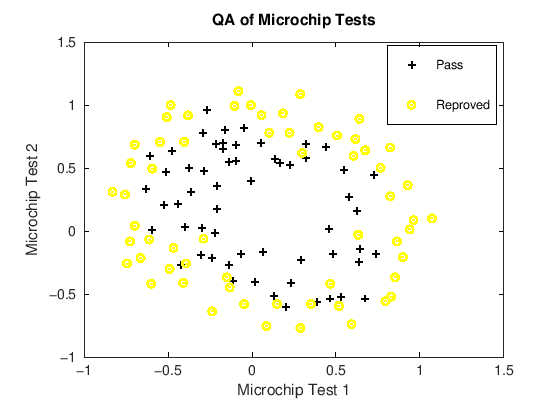

In [82]:
# Chamando função de plotagem
plotData_2(X, y);
hold on;
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
title('QA of Microchip Tests');
legend('Pass', 'Reproved');
hold off;

## Feature Mapping

One way to fit the data better is to create more features from each data point. In the provided function mapFeature.m, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [83]:
function out = mapFeature(X1, X2)
% MAPFEATURE Feature mapping function to polynomial features
%
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
%

degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

In [89]:
# Chamando função MapFeature
X_column1 = X(:, 1);
X_column2 = X(:, 2);

X_map = mapFeature(X_column1, X_column2);
X_map(1:10, :)

ans =

 Columns 1 through 4:

   1.000000000000000   0.051267000000000   0.699560000000000   0.002628305289000
   1.000000000000000  -0.092742000000000   0.684940000000000   0.008601078564000
   1.000000000000000  -0.213710000000000   0.692250000000000   0.045671964100000
   1.000000000000000  -0.375000000000000   0.502190000000000   0.140625000000000
   1.000000000000000  -0.513250000000000   0.465640000000000   0.263425562500000
   1.000000000000000  -0.524770000000000   0.209800000000000   0.275383552900000
   1.000000000000000  -0.398040000000000   0.034357000000000   0.158435841600000
   1.000000000000000  -0.305880000000000  -0.192250000000000   0.093562574400000
   1.000000000000000   0.016705000000000  -0.404240000000000   0.000279057025000
   1.000000000000000   0.131910000000000  -0.513890000000000   0.017400248100000

 Columns 5 through 8:

   0.035864342520000   0.489384193600000   0.000134745327251   0.001838657247973
  -0.063522705480000   0.469142803600000  -0.0007976812

Agora, é necessário realizar um procedimento de ```Regularization``` para diminuir a magnitude dos parâmetros, evitando assim problemas de overfitting e otimizando o modelo.

## Cost Function e Gradient

Tínhamos...

Calcula hypothesis

    z = X * theta;
    h = sigmoid(z);

Calcula função de custo J

    J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h));

Calcula gradiente para cada entrada

    grad = [(X' * (h - y)) / m];

In [93]:
# Adicionando termo responsável pela regularização
theta = zeros(size(X_map, 2), 1) # 28 features
lambda = 1;

theta =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



In [102]:
# Testando custo com regularização
h = sigmoid(X_map * theta);
m = size(X_map, 1);
J = ((1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h))) + (lambda / 2*m) * sum(theta(2:28) .^ 2)

J =  0.69315


In [106]:
% Testando gradient
grad = [(X_map' * (h - y)) / m]

grad =

   0.008474576
   0.018788093
   0.000077771
   0.050344640
   0.011501331
   0.037664847
   0.018355987
   0.007323934
   0.008192445
   0.023476489
   0.039348623
   0.002239239
   0.012860050
   0.003095937
   0.039302817
   0.019970747
   0.004329832
   0.003386439
   0.005838221
   0.004476291
   0.031007985
   0.031031244
   0.001097402
   0.006315708
   0.000408503
   0.007265043
   0.001376462
   0.038793636



In [123]:
size(gradient, 1)

ans =  28


In [127]:
sum(h-y)

ans = 0


In [153]:
sum(0 * X_map(:, 1))

ans = 0


In [156]:
gradient(1) = (1/m) * sum(sum(h - y) * X_map(:, 1));
gradient(1)

ans = 0


In [158]:
gradient = zeros(size(X_map, 2), 1);

gradient(1) = (1/m) * sum(sum(h - y) * X_map(:, 1));

for i = 2:size(gradient, 1),
    gradient(i) = ((1/m) * sum(sum(h - y) * X_map(:, 1))) + (lambda/m) * theta(i);
end

gradient

gradient =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



In [235]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
%COSTFUNCTION Compute cost and gradient for logistic regression
%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
%   parameter for logistic regression and the gradient of the cost
%   w.r.t. to the parameters.

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta, 1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Note: grad should have the same dimensions as theta
%
    
# Calcula hypothesis
z = X * theta;
h = sigmoid(z);

% We want the regularization to exclude the bias feature, so we can set theta(1) to zero
% or change the whole vector theta1 = [0 ; theta(2:size(theta), :)];
theta(1) = 0;

# Calcula função de custo J
unreg_J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h)); % Custo sem regularização
reg_J = (lambda / (2 * m)) * (theta' * theta); % Custo da regularização

J = unreg_J + reg_J; % Somando os termos

# Calcula gradiente para theta_0
grad = (X' * (h - y) + lambda * theta) / m; % Termo (lambda*theta/2) aplicado


% =============================================================

end

In [236]:
# Retornando parâmetros
initial_theta = zeros(size(X_map, 2), 1);
lambda = 1;

[cost, gradient] = costFunctionReg(initial_theta, X_map, y, lambda);

cost
gradient

cost =  0.69315
gradient =

   0.008474576
   0.018788093
   0.000077771
   0.050344640
   0.011501331
   0.037664847
   0.018355987
   0.007323934
   0.008192445
   0.023476489
   0.039348623
   0.002239239
   0.012860050
   0.003095937
   0.039302817
   0.019970747
   0.004329832
   0.003386439
   0.005838221
   0.004476291
   0.031007985
   0.031031244
   0.001097402
   0.006315708
   0.000408503
   0.007265043
   0.001376462
   0.038793636



In [240]:
# Testando com outro theta
test_theta = ones(size(X_map, 2),1);
[cost, grad] = costFunctionReg(test_theta, X_map, y, 10);
cost
grad

cost =  3.1645
grad =

   0.346045
   0.161352
   0.194796
   0.226863
   0.092186
   0.244386
   0.143392
   0.108442
   0.102314
   0.183468
   0.173530
   0.087256
   0.118228
   0.085843
   0.199949
   0.135227
   0.094975
   0.093564
   0.099798
   0.091402
   0.174852
   0.149554
   0.086786
   0.098977
   0.085320
   0.101907
   0.084502
   0.182283



In [238]:
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


## Otimizando via fminunc

Após o cálculo da função de custo e do gradiente, é possível otimizar os parâmetros theta através da função ```fminunc``` 

In [243]:
% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X_map, y, lambda)), initial_theta, options);

In [245]:
# Melhores parâmetros
theta

theta =

   1.273005
   0.624876
   1.177376
  -2.020142
  -0.912616
  -1.429907
   0.125668
  -0.368551
  -0.360033
  -0.171068
  -1.460894
  -0.052499
  -0.618889
  -0.273745
  -1.192301
  -0.240993
  -0.207934
  -0.047224
  -0.278327
  -0.296602
  -0.453957
  -1.045511
   0.026463
  -0.294330
   0.014381
  -0.328703
  -0.143796
  -0.924883



In [247]:
# Menor Custo J
J

J =  0.52900


## Decision Boundary

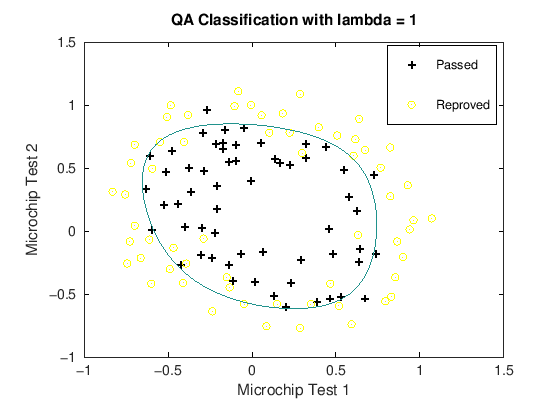

In [251]:
plotDecisionBoundary(theta, X_map, y)
hold on;
title(sprintf('QA Classification with lambda = %g', lambda));
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
legend('Passed', 'Reproved', 'Decision Boundary');
hold off;

## Prevendo Valores


In [254]:
p = predictions(theta, X_map);

fprintf('Train Accuracy: %f\n', mean(double(p==y))*100);
fprintf('Expected Accuracy (with lambda=1): 83.1 (approx)\n')

Train Accuracy: 83.050847
Expected Accuracy (with lambda=1): 83.1 (approx)
